In [23]:
import pandas as pd

df =pd.read_csv("romanian_political_articles_v1.csv")

In [24]:
import re
import spacy
from unidecode import unidecode

nlp = spacy.load("ro_core_news_sm")

def preprocess_text(text : str):
    if not text or len(text.strip()) == 0:
        return ""

    # Remove all punctuation except periods
    text = re.sub(r'[^\w\s.]', '', text)

    # Remove digits and numbers
    text = re.sub(r'\b\d+\b', '', text)

    text = re.sub(r'\.\s+', ' PERIOD ', text)
    if text.endswith('.'):
        text = text[:-1] + ' PERIOD'

    doc = nlp(text)
    sentences = []
    for sent in doc.sents:
        words = sent.text.split()
        if words:
            words[0] = words[0].lower()
            sentences.append(' '.join(words))
    cleaned = ' '.join(sentences)

    return cleaned

df['cleantext'] = df['maintext'].apply(preprocess_text)
df.head()

,url,title,date_publish,description,maintext,source_domain,authors,cleantext
0,https://www.realitatea.net/stiri/politica/ion-...,Ion Cristoiu: Ilie Bolojan și rețeaua sa duc o...,2025-04-08 08:38:37,Ilie Bolojan si reteaua sa duc o politica anti...,"""Domnul Sprînceană a intervenit, nu știu ce l-...",www.realitatea.net,Realitatea.NET,domnul Sprînceană a intervenit nu știu ce la a...
1,https://www.realitatea.net/stiri/politica/scan...,Scandalurile prin care a devenit celebru candi...,2025-04-13 13:09:59,Tupeu incredibil din partea lui Nicusor Dan! S...,Activistă și ea din zona soroșistă ce a venit ...,www.realitatea.net,Georgiana Balaban,activistă și ea din zona soroșistă ce a venit ...
2,https://www.realitatea.net/stiri/politica/crin...,"Crin Antonescu: „Nicușor dă prea puțină apă, P...",2025-04-12 20:54:54,",,Nicusor Dan da prea putina apa si Ponta prea...","Crin Antonescu: „Ei promit lapte și miere, dar...",www.realitatea.net,Georgiana Balaban,crin Antonescu Ei promit lapte și miere dar nu...
3,https://www.realitatea.net/stiri/politica/lasc...,Lasconi: „Nicușor Dan mi-a cerut să mă retrag ...,2025-04-12 19:02:32,",,Nicusor Dan mi-a cerut sa ma duc la Stejarii...",Candidata la prezidențiale trădată de propriul...,www.realitatea.net,Georgiana Balaban,candidata la prezidențiale trădată de propriul...
4,https://www.realitatea.net/stiri/politica/adri...,Adrian Severin: „Încălcarea democrației schimb...,2025-04-13 10:28:52,Adrian Severin spune ca dreptul de a alege si ...,Adrian Severin: „În democrație nu poți închide...,www.realitatea.net,Georgiana Balaban,adrian Severin În democrație nu poți închide c...


In [25]:
def extract_ngrams_spacy(text, n):
    doc = nlp(text)
    tokens = [
        token.text for token in doc
        if not token.is_space and not token.is_punct and token.is_alpha
    ]

    return [tuple(tokens[i:i+n]) for i in range(len(tokens) - n + 1)]

df['bigrams'] = df['cleantext'].apply(lambda t: extract_ngrams_spacy(t, 2))
df['trigrams'] = df['cleantext'].apply(lambda t: extract_ngrams_spacy(t, 3))
df['all_ngrams'] = df['bigrams'] + df['trigrams']
df.head()

,url,title,date_publish,description,maintext,source_domain,authors,cleantext,bigrams,trigrams,all_ngrams
0,https://www.realitatea.net/stiri/politica/ion-...,Ion Cristoiu: Ilie Bolojan și rețeaua sa duc o...,2025-04-08 08:38:37,Ilie Bolojan si reteaua sa duc o politica anti...,"""Domnul Sprînceană a intervenit, nu știu ce l-...",www.realitatea.net,Realitatea.NET,domnul Sprînceană a intervenit nu știu ce la a...,"[(domnul, Sprînceană), (Sprînceană, a), (a, in...","[(domnul, Sprînceană, a), (Sprînceană, a, inte...","[(domnul, Sprînceană), (Sprînceană, a), (a, in..."
1,https://www.realitatea.net/stiri/politica/scan...,Scandalurile prin care a devenit celebru candi...,2025-04-13 13:09:59,Tupeu incredibil din partea lui Nicusor Dan! S...,Activistă și ea din zona soroșistă ce a venit ...,www.realitatea.net,Georgiana Balaban,activistă și ea din zona soroșistă ce a venit ...,"[(activistă, și), (și, ea), (ea, din), (din, z...","[(activistă, și, ea), (și, ea, din), (ea, din,...","[(activistă, și), (și, ea), (ea, din), (din, z..."
2,https://www.realitatea.net/stiri/politica/crin...,"Crin Antonescu: „Nicușor dă prea puțină apă, P...",2025-04-12 20:54:54,",,Nicusor Dan da prea putina apa si Ponta prea...","Crin Antonescu: „Ei promit lapte și miere, dar...",www.realitatea.net,Georgiana Balaban,crin Antonescu Ei promit lapte și miere dar nu...,"[(crin, Antonescu), (Antonescu, Ei), (Ei, prom...","[(crin, Antonescu, Ei), (Antonescu, Ei, promit...","[(crin, Antonescu), (Antonescu, Ei), (Ei, prom..."
3,https://www.realitatea.net/stiri/politica/lasc...,Lasconi: „Nicușor Dan mi-a cerut să mă retrag ...,2025-04-12 19:02:32,",,Nicusor Dan mi-a cerut sa ma duc la Stejarii...",Candidata la prezidențiale trădată de propriul...,www.realitatea.net,Georgiana Balaban,candidata la prezidențiale trădată de propriul...,"[(candidata, la), (la, prezidențiale), (prezid...","[(candidata, la, prezidențiale), (la, preziden...","[(candidata, la), (la, prezidențiale), (prezid..."
4,https://www.realitatea.net/stiri/politica/adri...,Adrian Severin: „Încălcarea democrației schimb...,2025-04-13 10:28:52,Adrian Severin spune ca dreptul de a alege si ...,Adrian Severin: „În democrație nu poți închide...,www.realitatea.net,Georgiana Balaban,adrian Severin În democrație nu poți închide c...,"[(adrian, Severin), (Severin, În), (În, democr...","[(adrian, Severin, În), (Severin, În, democraț...","[(adrian, Severin), (Severin, În), (În, democr..."


In [26]:
from collections import defaultdict

phrase_counts = defaultdict(int)

for _, row in df.iterrows():
    source = row['source_domain']
    for phrase in row['all_ngrams']:
        phrase_counts[(phrase, source)] += 1


nij_df = pd.DataFrame(
    [(phrase, source, count) for (phrase, source), count in phrase_counts.items()],
    columns=['phrase', 'source', 'count']
)

# Pivot to get matrix format (rows=phrases, columns=sources)
nij_matrix = nij_df.pivot_table(index='phrase', columns='source', values='count', fill_value=0)

nij_matrix.head()

source,a1.ro,adevarul.ro,informat.ro,observatornews.ro,stirileprotv.ro,www.antena3.ro,www.antidotul.ro,www.b1tv.ro,www.digi24.ro,www.gandul.ro,www.gds.ro,www.mediafax.ro,www.news.ro,www.observatorulph.ro,www.realitatea.net
phrase,,,,,,,,,,,,,,,
"(A, A)",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(A, A, apărut)",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(A, ANULUI)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
"(A, ANULUI, DOUĂ)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
"(A, Adică)",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
phrase_totals = nij_matrix.sum(axis=1)
nij_matrix = nij_matrix[phrase_totals >= 5]

nonzero_sources = (nij_matrix > 0).sum(axis=1)

# Keep only phrases that appear in <= 80% of sources
max_sources = int(nij_matrix.shape[1] * 0.8)
nij_matrix = nij_matrix[nonzero_sources <= max_sources]

# For each phrase: what % of its usage is in the most dominant source?
phrase_distribution = nij_matrix.div(nij_matrix.sum(axis=1), axis=0)
max_source_share = phrase_distribution.max(axis=1)

# Remove phrases where over 90% of uses come from one source
nij_matrix = nij_matrix[max_source_share < 0.9]

In [28]:
import numpy as np

Nij = nij_matrix.values
N_total = Nij.sum()

# Joint distribution
P_ij = Nij / N_total

# Marginals
P_i = P_ij.sum(axis=1, keepdims=True)     # phrase totals
P_j = P_ij.sum(axis=0, keepdims=True)     # source totals

In [33]:
eps = 1e-12
MI = (P_ij * np.log2((P_ij + eps) / (P_i @ P_j + eps))).sum(axis=1)

MI

array([1.01822206e-05, 9.78418916e-06, 1.38198364e-05, ...,
       5.09138452e-06, 9.43031473e-06, 5.79510114e-06], shape=(88109,))

In [ ]:
nij_matrix['info_score'] = MI

# Sort and keep top N
N = 1000
top_phrases_df = nij_matrix.sort_values('info_score', ascending=False).head(N)

nij_matrix = nij_matrix.drop(columns=['info_score'])

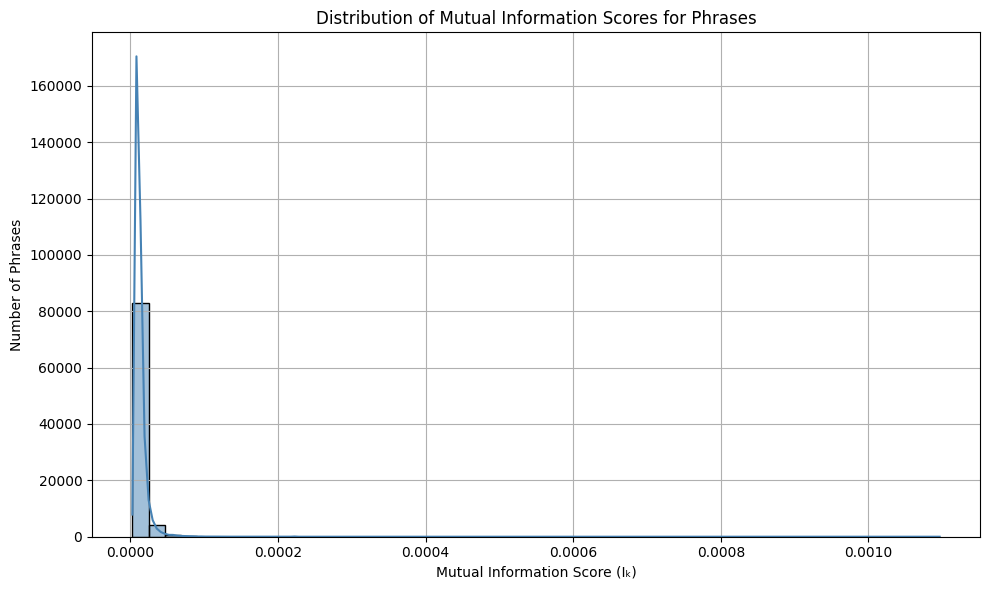

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of mutual information scores
plt.figure(figsize=(10, 6))
sns.histplot(MI, bins=50, kde=True, color='steelblue')
plt.title("Distribution of Mutual Information Scores for Phrases")
plt.xlabel("Mutual Information Score (Iₖ)")
plt.ylabel("Number of Phrases")
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim

nij_tensor = torch.tensor(nij_matrix.values, dtype=torch.float32)
num_phrases, num_sources = nij_tensor.shape

class PoissonBiasModel(nn.Module):
    def __init__(self, num_phrases, num_sources):
        super().__init__()
        self.U = nn.Embedding(num_phrases, 1)  # 1D embedding for each phrase
        self.V = nn.Embedding(num_sources, 1)  # 1D embedding for each source

    def forward(self, i_idx, j_idx):
        u_i = self.U(i_idx).squeeze()
        v_j = self.V(j_idx).squeeze()
        lambda_ij = torch.exp(u_i * v_j)
        return lambda_ij

model = PoissonBiasModel(num_phrases, num_sources)

rows, cols = np.nonzero(nij_matrix.values)
counts = nij_matrix.values[rows, cols]
i_idx = torch.tensor(rows, dtype=torch.long)
j_idx = torch.tensor(cols, dtype=torch.long)
targets = torch.tensor(counts, dtype=torch.float32)

optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(500):
    optimizer.zero_grad()
    lambda_pred = model(i_idx, j_idx)
    loss = (lambda_pred - targets * torch.log(lambda_pred + 1e-9)).mean()
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.6f}")

Epoch 0, Loss: 4.047426
Epoch 50, Loss: 1.442563
Epoch 100, Loss: 1.069799
Epoch 150, Loss: 0.750453
Epoch 200, Loss: 0.508767
Epoch 250, Loss: 0.387388
Epoch 300, Loss: 0.316483
Epoch 350, Loss: 0.267552
Epoch 400, Loss: 0.232276
Epoch 450, Loss: 0.208230


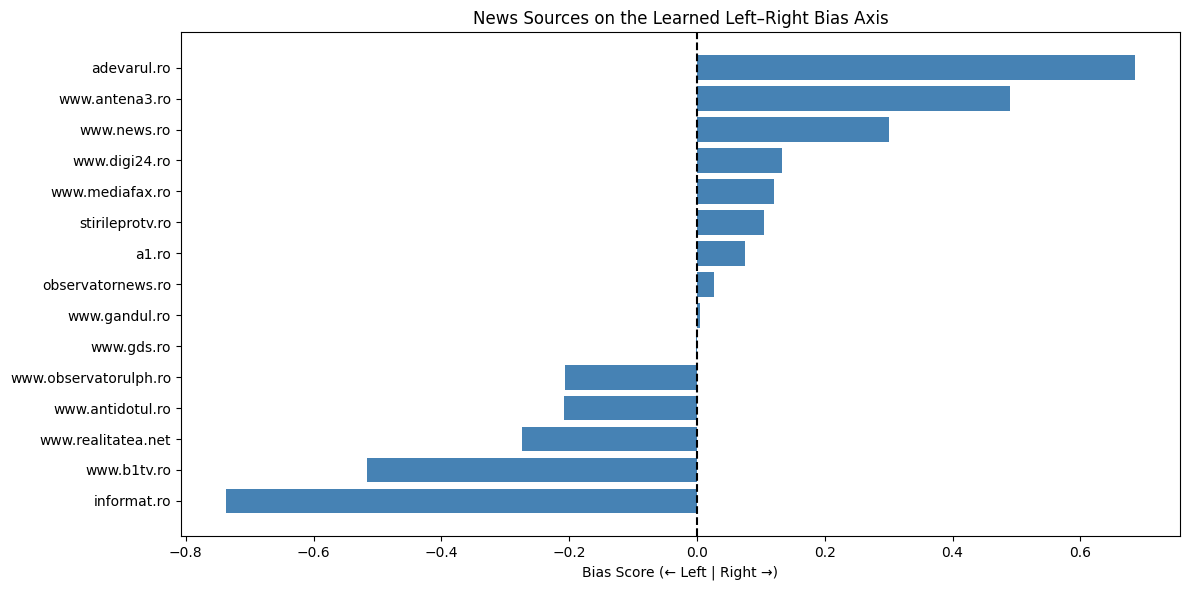

In [36]:
source_positions = model.V.weight.detach().squeeze().numpy()

source_bias_df = pd.DataFrame({
    'source': nij_matrix.columns,
    'bias_score': source_positions
})

source_bias_df['bias_score'] -= source_bias_df['bias_score'].mean()
source_bias_df = source_bias_df.sort_values(by='bias_score')

plt.figure(figsize=(12, 6))
plt.barh(source_bias_df['source'], source_bias_df['bias_score'], color='steelblue')
plt.axvline(0, color='black', linestyle='--')
plt.title("News Sources on the Learned Left–Right Bias Axis")
plt.xlabel("Bias Score (← Left | Right →)")
plt.tight_layout()
plt.show()